In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
import pylab as pl
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
student_mat = pd.read_csv('gdrive/My Drive/students alcohol comsumption/student-mat.csv')
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


Here we are comparing the Daily alcohol, Weekly alcohol, and health with
each age. First grouping the age and get the max, min and mean of alcohol consumption in student_mat data.

In [ ]:
display(student_mat[["school","sex","age","Dalc","Walc","health",]].groupby(["age"]).agg(["max",'mean',"min"]).style.background_gradient(cmap="Oranges_r"))

Add new column (label) for student_mat the value will be 1

In [ ]:
student_mat['label']='1'
student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1


In [ ]:
student_por = pd.read_csv('gdrive/My Drive/students alcohol comsumption/student-por.csv')
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


Here we are comparing the Daily alcohol, Weekly alcohol, and health with
each age. First grouping the age and get the max, min and mean of alcohol consumption in student_por data.

In [ ]:
display(student_por[['school','sex','age','Dalc','Walc',
                     'health',]].groupby(['age']).agg(['max','mean','min']).style.background_gradient(cmap='Oranges'))

Add new column (label) for student_mat the value will be 0

In [ ]:
student_por['label']='0'
student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,0
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,0


#Barplots
Showing the frequency of each category seperated by label

#student_mat dataset

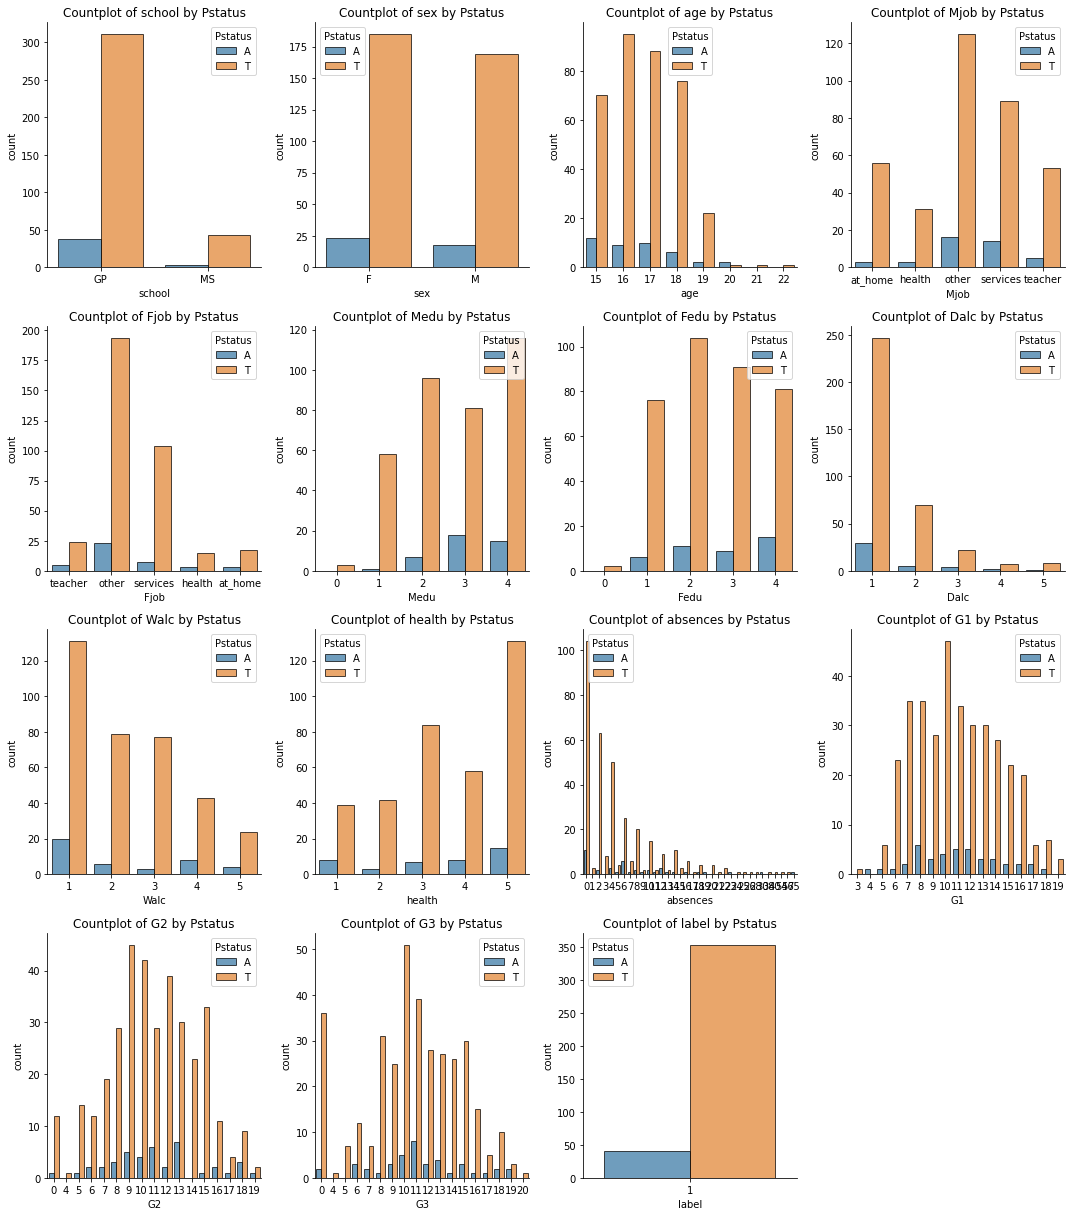

In [ ]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,17])
fft=['school','sex','age','Mjob','Fjob','Medu','Fedu','Dalc','Walc','health'
,'absences','G1','G2','G3','label']
n = 1
for f in fft:
  plt.subplot(4,4,n)
  sns.countplot(x=f, hue='Pstatus',edgecolor='black',alpha=0.7, data=student_mat)
  sns.despine()
  plt.title('Countplot of {} by Pstatus'.format(f))
  n=n+1

plt.tight_layout()
plt.show()

#student_por

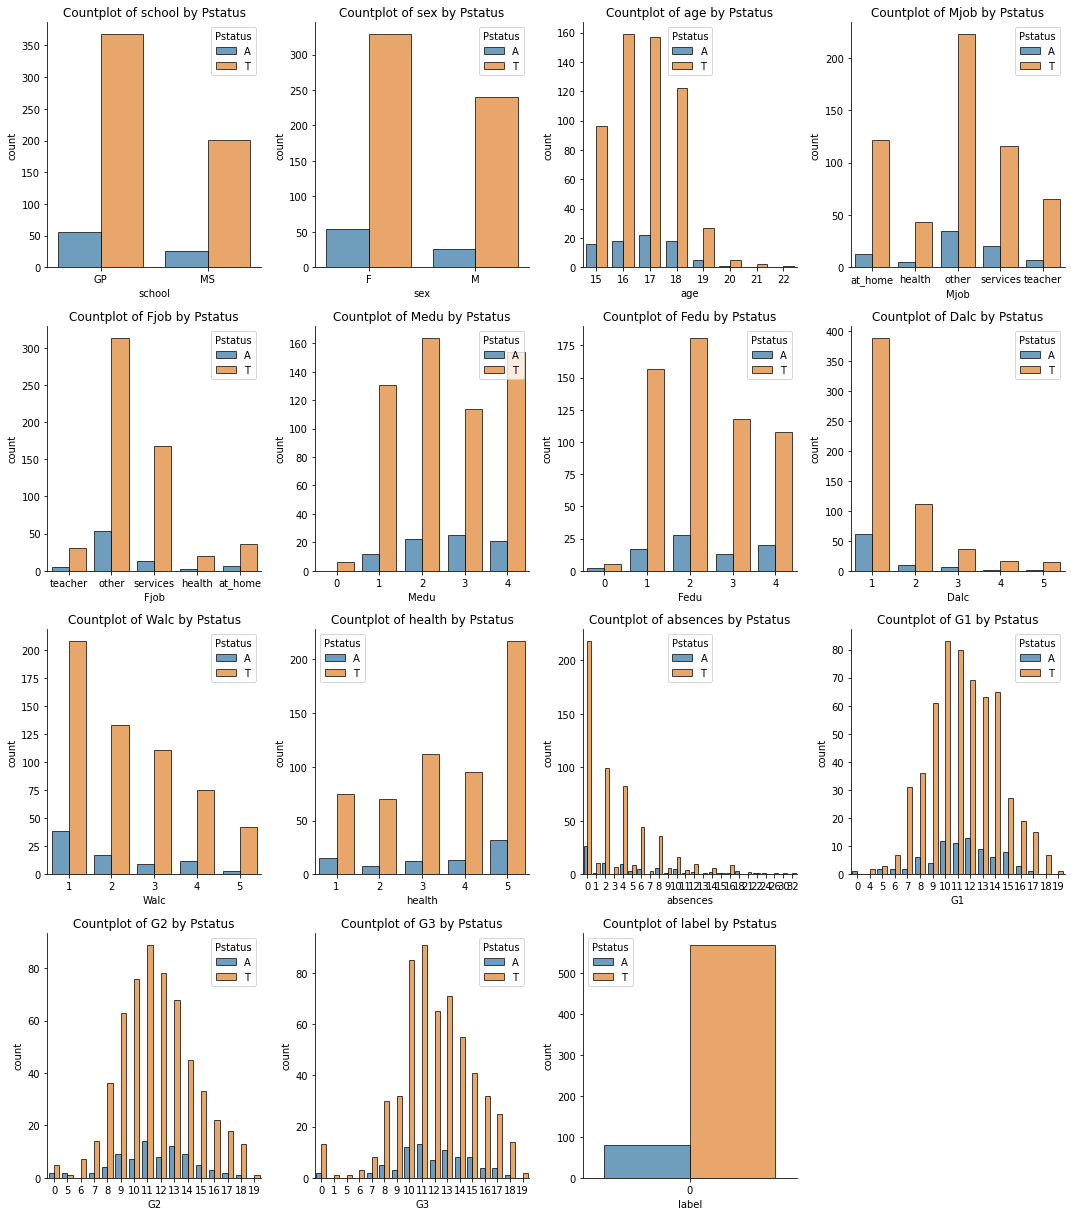

In [ ]:
#barplots showing the frequency of each category separated by label
plt.figure(figsize=[15,17])
fft=['school','sex','age','Mjob','Fjob','Medu','Fedu',
     'Dalc','Walc','health','absences','G1','G2','G3','label']
n = 1

for f in fft:
  plt.subplot(4,4,n)
  sns.countplot(x=f, hue='Pstatus', edgecolor='black',
                alpha=0.7, data=student_por)
  sns.despine()
  plt.title("Countplot of {} by Pstatus".format(f))
  n=n+1

plt.tight_layout()
plt.show()

#Visualisation workday alcohol consumption groupby age 
Dalc -workday alcohol consumption (numeric: from1 -very low to 5 -very high)

#student_mat

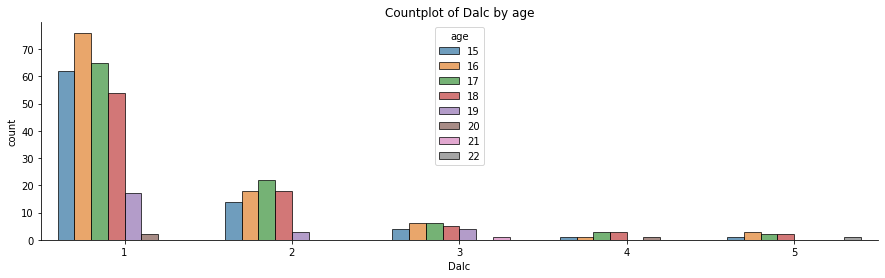

In [ ]:
plt.figure(figsize=[15,4])
sns.countplot(x='Dalc',hue='age',edgecolor='black',alpha=0.7,data=student_mat)
sns.despine()
plt.title('Countplot of Dalc by age')
plt.show()

Max: 149 ocurred in [16 17]
Max: 3 ocurred in [21]
Mean: 73.125


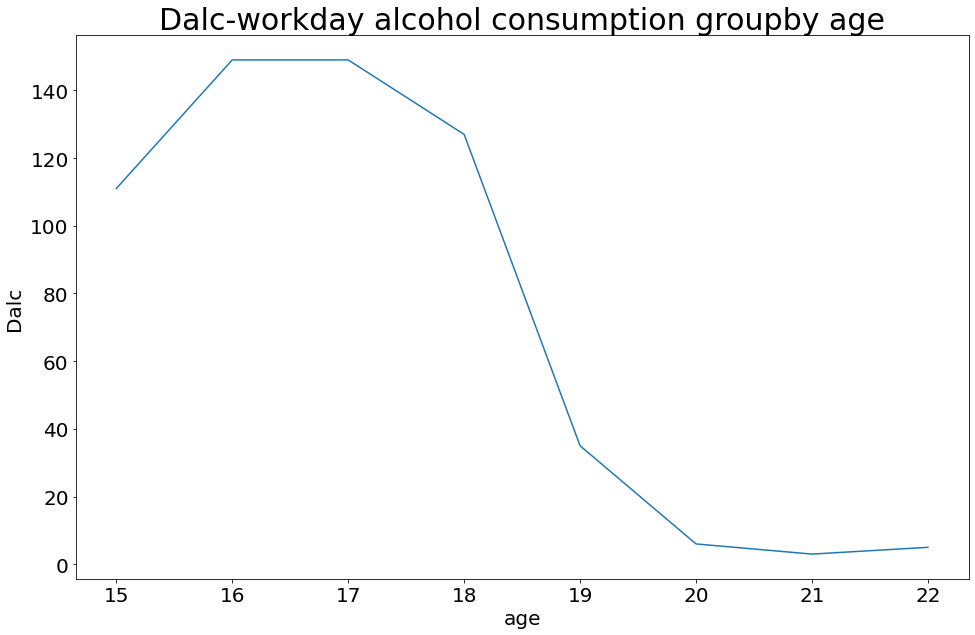

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = student_mat.groupby('age').sum()['Dalc']
dfg.plot(kind='line', title='Dalc-workday alcohol consumption groupby age', fontsize=20)

plt.ylabel('Dalc ')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: '+ str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' +str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

#student_por dataset


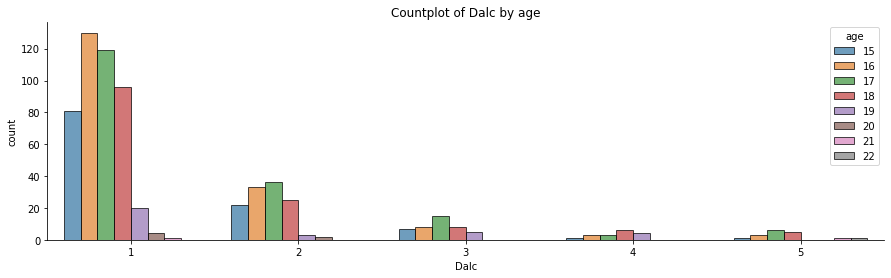

In [ ]:
plt.figure(figsize=[15,4])
sns.countplot(x='Dalc', hue='age',edgecolor='black', alpha=0.7, data=student_por)
sns.despine()
plt.title('Countplot of Dalc by age')
plt.show()

Max: 278 ocurred in [17]
Max: 5 ocurred in [22]
Mean: 121.875


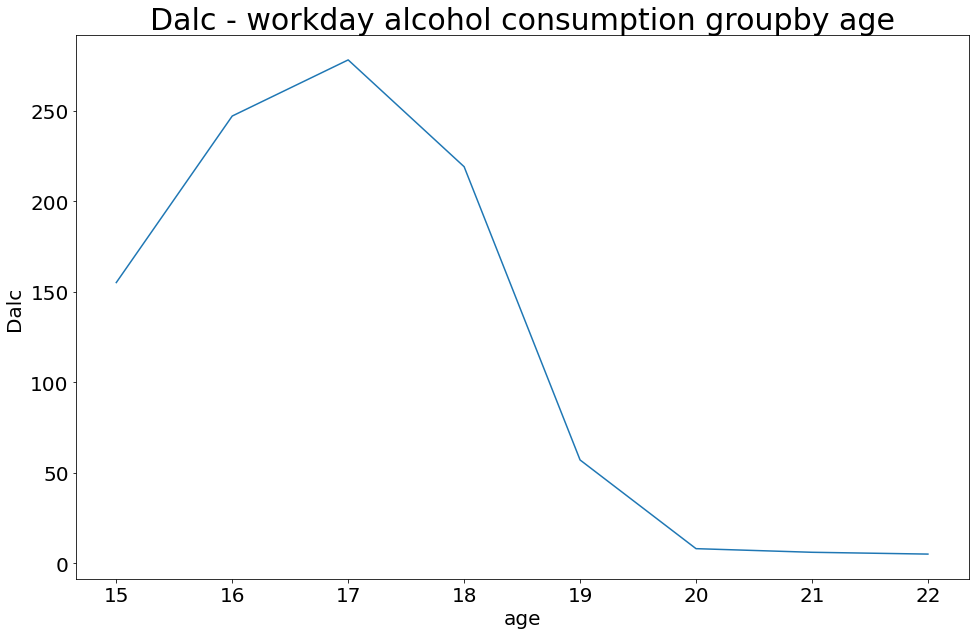

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = student_por.groupby('age').sum()['Dalc']
dfg.plot(kind='line', title='Dalc - workday alcohol consumption groupby age', fontsize=20)

plt.ylabel('Dalc ')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

#Visualisation weekend alcohol consumption groupby age

walc - weekend alcohol consumption(numeric:from 1-very low to 5-very high)

#student_mat

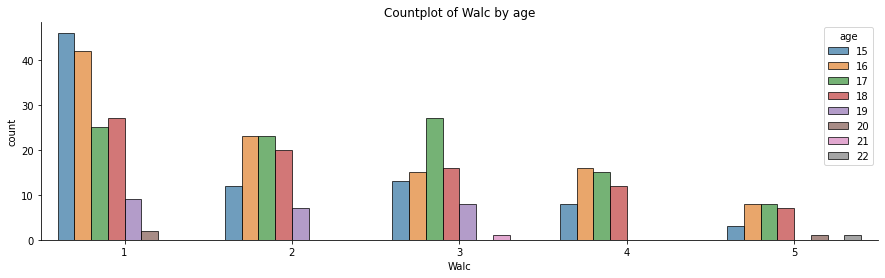

In [ ]:
plt.figure(figsize=[15,4])
sns.countplot(x='Walc', hue='age', edgecolor='black', alpha=0.7, data = student_mat)
sns.despine()
plt.title('Countplot of Walc by age')
plt.show()

Max: 252 ocurred in [17]
Max: 3 ocurred in [21]
Mean: 113.125


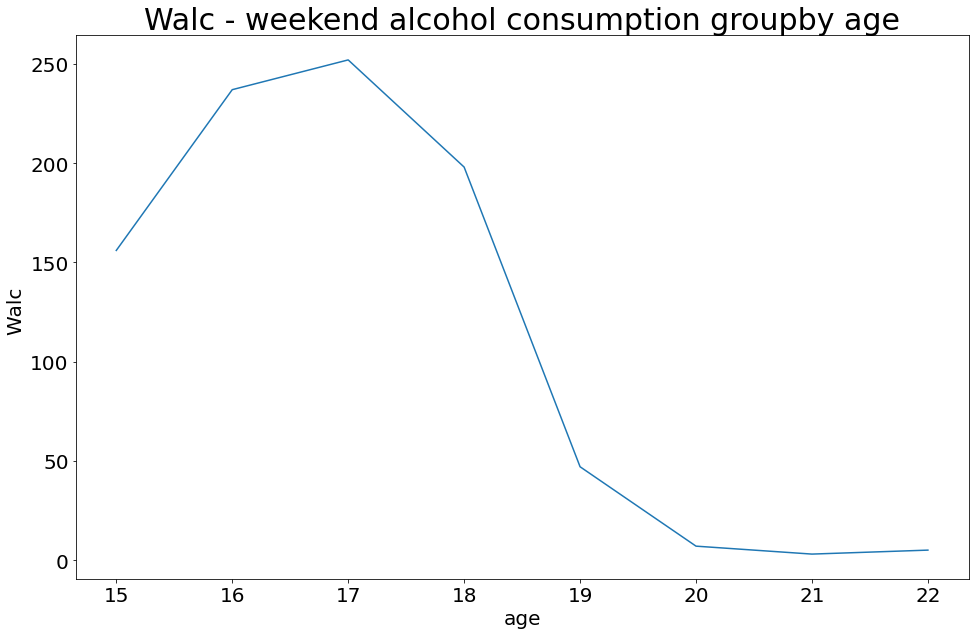

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = student_mat.groupby('age').sum()['Walc']
dfg.plot(kind='line', title='Walc - weekend alcohol consumption groupby age', fontsize=20)

plt.ylabel('Walc ')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))


#student_por

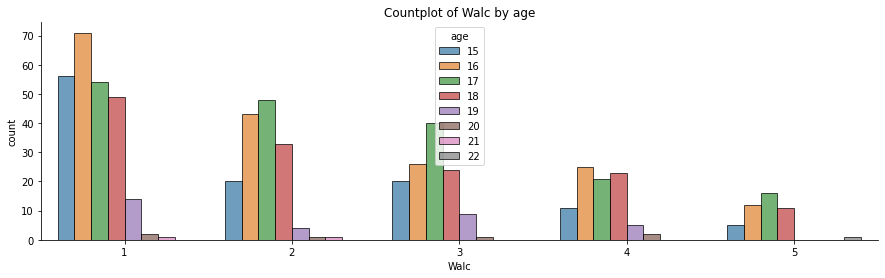

In [ ]:
plt.figure(figsize=[15,4])
sns.countplot(x='Walc', hue='age', edgecolor='black', alpha=0.7, data=student_por)
sns.despine()
plt.title('Countplot of Walc by age')
plt.show()

Max: 434 ocurred in [17]
Max: 3 ocurred in [21]
Mean: 185.0


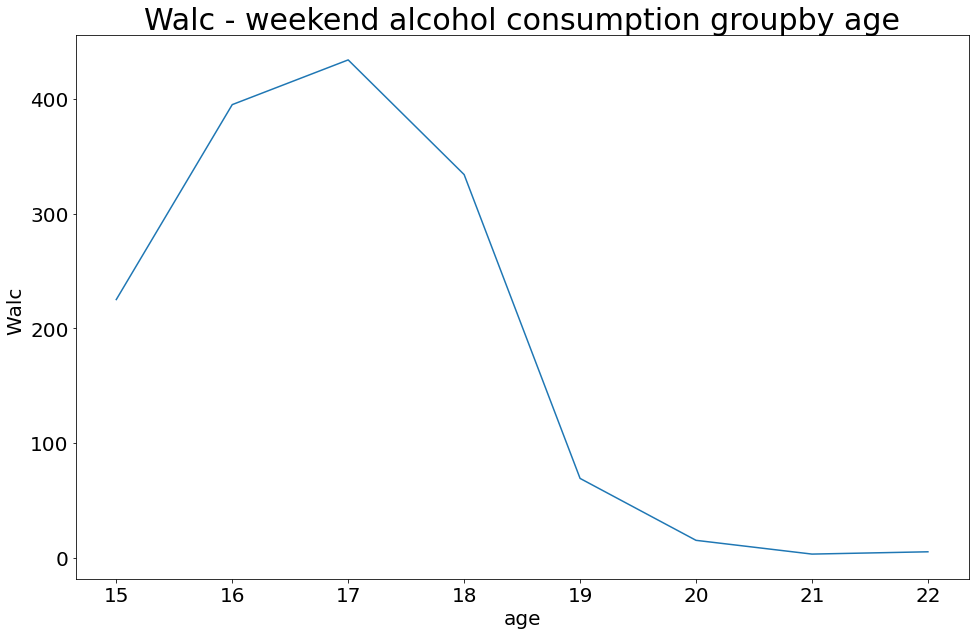

In [ ]:
fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111)
dfg = student_por.groupby('age').sum()['Walc']
dfg.plot(kind='line', title='Walc - weekend alcohol consumption groupby age', fontsize=20)
plt.ylabel('Walc ')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
print('Max: ' + str(dfg.max()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.max()].index.values[0:]))
print('Max: ' + str(dfg.min()) + ' ocurred in ' + str(dfg.loc[dfg == dfg.min()].index.values[0:]))
print('Mean: ' + str(dfg.mean()))

#Merge Dataset

In [ ]:
Data = student_mat.append([student_mat, student_por])
x = Data.iloc[:, [3]].values
Data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,1


In [ ]:
##Convert string to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
  for c in df.columns:
    if df.dtypes[c] == object:
      le.fit(df[c].astype(str))
      df[c] = le.transform(df[c].astype(str))
  return df

In [ ]:
Data = FunLabelEncoder(Data)
Data.info()
Data.iloc[0:4,:]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      1439 non-null   int64
 1   sex         1439 non-null   int64
 2   age         1439 non-null   int64
 3   address     1439 non-null   int64
 4   famsize     1439 non-null   int64
 5   Pstatus     1439 non-null   int64
 6   Medu        1439 non-null   int64
 7   Fedu        1439 non-null   int64
 8   Mjob        1439 non-null   int64
 9   Fjob        1439 non-null   int64
 10  reason      1439 non-null   int64
 11  guardian    1439 non-null   int64
 12  traveltime  1439 non-null   int64
 13  studytime   1439 non-null   int64
 14  failures    1439 non-null   int64
 15  schoolsup   1439 non-null   int64
 16  famsup      1439 non-null   int64
 17  paid        1439 non-null   int64
 18  activities  1439 non-null   int64
 19  nursery     1439 non-null   int64
 20  higher      1439 non-null   int

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,label
0,0,0,18,1,0,0,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6,1
1,0,0,17,1,0,1,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6,1
2,0,0,15,1,1,1,1,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10,1
3,0,0,15,1,0,1,4,2,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15,1


#Spliting Data
Data for training and testing to select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 20%.

In [ ]:
from sklearn.model_selection import train_test_split
Y = Data['label']
X = Data.drop(columns=['label'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=9)


In [ ]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (1223, 33)
Y train shape:  (1223,)
X test shape:  (216, 33)
Y test shape:  (216,)


#Train Data

In [ ]:
X_train.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
403,0,0,17,1,0,1,2,1,3,2,0,1,2,2,0,0,1,0,1,1,1,1,1,4,3,4,2,2,1,10,12,15,15
445,1,1,15,0,0,1,1,1,2,2,0,1,4,2,0,0,1,0,1,1,1,0,1,5,4,5,2,4,4,8,7,9,9
290,0,0,19,1,0,1,2,2,3,3,1,1,1,2,0,0,1,0,0,1,1,1,0,4,3,3,1,1,5,0,10,10,11
244,0,0,18,1,0,1,2,1,2,2,0,2,2,3,0,0,1,1,0,0,1,1,1,4,4,4,1,1,3,0,7,0,0
313,0,0,19,1,1,1,3,2,3,2,3,2,2,2,1,0,1,1,0,0,1,1,1,4,2,2,1,2,1,22,13,10,11
50,0,0,16,1,1,1,2,2,3,3,0,1,3,2,0,0,1,1,0,1,1,1,0,4,3,3,2,3,4,2,12,13,13
130,0,0,15,0,0,1,3,4,3,4,0,0,2,3,0,0,1,0,0,1,1,1,1,4,2,2,2,2,5,0,10,11,12
34,0,1,16,1,0,1,3,2,2,2,1,1,1,1,0,0,1,1,0,0,1,1,0,5,4,3,1,1,5,0,12,14,15
219,0,0,17,1,0,1,2,2,0,0,0,1,1,3,0,0,1,1,1,1,1,1,0,4,3,3,1,1,4,4,9,10,10
441,1,1,17,1,0,1,1,1,2,2,1,1,1,2,0,0,0,1,0,0,1,1,0,4,4,3,2,4,5,4,8,9,9


In [ ]:
Y_train.head(10)

403    0
445    0
290    0
244    1
313    1
50     1
130    0
34     1
219    1
441    0
Name: label, dtype: int64

#Test Data

In [ ]:
X_test.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
446,1,1,15,1,1,1,3,3,0,0,3,0,1,2,0,0,1,0,1,1,1,1,0,5,3,3,1,1,5,0,11,11,11
324,0,0,17,1,1,1,0,2,0,0,1,0,2,3,0,0,0,0,0,1,1,1,0,3,3,3,2,3,2,0,16,15,15
124,0,0,16,1,0,1,2,2,2,2,1,1,1,2,0,0,0,0,0,1,1,1,1,5,4,4,1,1,5,0,12,11,11
591,1,0,18,1,0,1,2,2,3,0,3,0,2,2,0,0,0,0,1,0,1,1,0,4,3,5,1,1,1,2,12,13,14
38,0,0,15,0,0,1,3,4,3,1,0,1,1,3,0,1,1,1,1,1,1,1,0,4,3,2,1,1,5,2,12,12,11
561,1,1,18,1,1,1,1,1,0,0,0,1,2,2,0,0,1,0,1,1,1,0,0,4,3,3,1,4,5,6,10,9,10
360,0,0,18,1,0,1,3,3,0,2,0,0,1,2,0,0,1,0,0,1,1,1,0,4,1,4,1,1,3,8,11,12,14
384,1,1,18,0,0,1,4,2,2,2,1,0,2,1,1,0,0,1,0,1,1,0,0,5,4,3,4,3,3,14,6,5,5
67,0,0,16,1,0,1,3,1,3,2,0,1,1,4,0,1,1,0,0,1,1,1,0,4,3,3,1,2,5,0,10,9,10
501,1,1,16,1,1,1,4,3,2,2,0,0,1,1,0,0,0,0,1,1,1,1,0,4,2,5,1,5,5,8,14,12,13


In [ ]:
Y_test.head(10)

446    0
324    1
124    0
591    0
38     1
561    0
360    0
384    1
67     0
501    0
Name: label, dtype: int64

#Model SVM(Support Vector Machinne)
SVMs belong to the supervised learning techniques.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), n_jobs=-1))

#We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

In [ ]:
test_acc_svmcla = round(svmcla.fit(X_train, Y_train).score(X_test, Y_test)*100, 2)
train_acc_svmcla = round(svmcla.fit(X_train, Y_train).score(X_train, Y_train)*100,2)

#Measurement is already done.
Now we have to evaluated the results using the Confusion Matrix

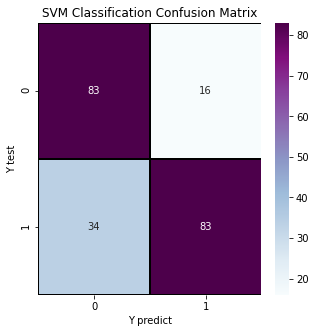

In [ ]:
#The confusion matrix
svmcla = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla, annot=True, linewidth=0.7, linecolor='black', fmt='g', ax=ax, cmap='BuPu')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [ ]:
model = pd.DataFrame({
    'Model' : ['SVM'],
    'Train Score':[train_acc_svmcla],
    'Test Score':[test_acc_svmcla]
})
model.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
0,SVM,78.9,78.7


In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(Y_test, Y_predict2)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.75
